# **3-1. Minimizing Cost, Gradient Descent**

**Jonathan Choi 2021**

**[Deep Learning By Torch] End to End study scripts of Deep Learning by implementing code practice with Pytorch.**

If you have an any issue, please PR below.

[[Deep Learning By Torch] - Github @JonyChoi](https://github.com/jonychoi/Deep-Learning-By-Torch)

## Theoretical Overview

$ H(x) = Wx $

$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left(Wx^{(i)} \right)^2 $

- $H(x)$: How to predict with given $x$.
- $cost(W)$: How well $H(x)$ predict $y$.

Note that $H(x)$ is simplified without $b$.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

## Data

Basically the PyTorch's Tensor is form of NCHW

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

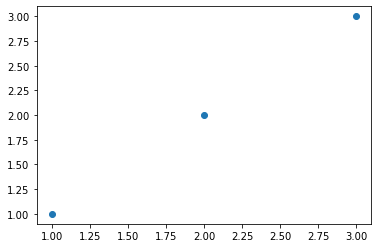

In [9]:
plt.scatter(x_train, y_train)
# matplotlib.pyplot.scatter(x_axis_data, y_axis_data, ...)
# - A scatter plot of y vs. x with varying marker size and/or color.

In [8]:
#Best fit line
xs = np.linspace(1, 3, 1000)
# np.linespace(start, stop, num): 
# - Return evenly spaced numbers over a specified interval.
# - Returns num evenly spaced samples, calculated over the interval [start, stop].

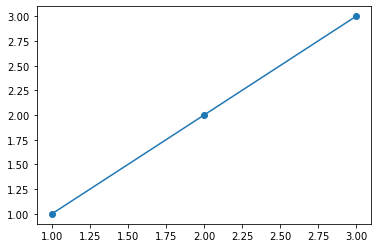

In [7]:
plt.scatter(x_train, y_train)
plt.plot(xs, xs)
# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
# - Plot y versus x as lines and/or markers.

## Cost by W

$ H(x) = Wx $

In [12]:
W_1 = np.linspace(-5, 7, 1000)
cost_1 = []
for W in W_1:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_1.append(cost.item())

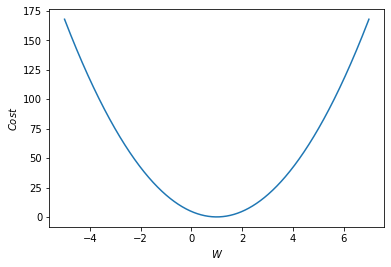

In [17]:
plt.plot(W_1, cost_1)
plt.xlabel('$W$')
plt.ylabel('$Cost$')
plt.show()

## Gradient Descent by Hand

In [19]:
W = 0

$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $

$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $

In [20]:
gradient = torch.sum((W * x_train - y_train)* x_train)
print(gradient)

tensor(-14.)


## Training

just printing torch.tensor shows as ```tensor(value)```

so we use tensor.item() to show just value.

In [45]:
#Data

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

#Initialize the Weights

W = torch.zeros(1)

#Set Learning Rate

lr = 0.1

nb_epochs = 10

for epoch in range(nb_epochs + 1):

    #Hypothesis
    pred = W * x_train

    #cost
    cost = torch.mean((W * x_train - y_train)**2)

    # gradient
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('W: ', W, 'W.item(): ', W.item())
    print('Gradient: ', gradient)
    print('cost: ', cost, 'cost.item(): ', cost.item())
    print('Epoch {:3d}/{} W: {: .3f}, Cost: {: .6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))
    print()
    # Reduce Cost with Gradient

    W -= lr *gradient

W:  tensor([0.]) W.item():  0.0
Gradient:  tensor(-14.)
cost:  tensor(4.6667) cost.item():  4.666666507720947
Epoch   0/10 W:  0.000, Cost:  4.666667

W:  tensor([1.4000]) W.item():  1.399999976158142
Gradient:  tensor(5.6000)
cost:  tensor(0.7467) cost.item():  0.7466664910316467
Epoch   1/10 W:  1.400, Cost:  0.746666

W:  tensor([0.8400]) W.item():  0.8400000333786011
Gradient:  tensor(-2.2400)
cost:  tensor(0.1195) cost.item():  0.11946665495634079
Epoch   2/10 W:  0.840, Cost:  0.119467

W:  tensor([1.0640]) W.item():  1.0640000104904175
Gradient:  tensor(0.8960)
cost:  tensor(0.0191) cost.item():  0.0191146582365036
Epoch   3/10 W:  1.064, Cost:  0.019115

W:  tensor([0.9744]) W.item():  0.9744000434875488
Gradient:  tensor(-0.3584)
cost:  tensor(0.0031) cost.item():  0.00305833644233644
Epoch   4/10 W:  0.974, Cost:  0.003058

W:  tensor([1.0102]) W.item():  1.0102399587631226
Gradient:  tensor(0.1434)
cost:  tensor(0.0005) cost.item():  0.0004893290461041033
Epoch   5/10 W:  1.

## Training with ```optim```

In [48]:
#Data

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

#Model Initialize

W = torch.zeros(1, requires_grad=True)

#Set Optimizer

optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10

for epoch in range(nb_epochs + 1):

    #model
    predcition = W * x_train

    #cost
    cost= torch.mean((W * x_train - y_train)**2)

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.3f}'.format(epoch, nb_epochs, W.item(), cost.item()))

    #gradient descent by optimizer

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.667
Epoch    1/10 W: 1.400 Cost: 0.747
Epoch    2/10 W: 0.840 Cost: 0.119
Epoch    3/10 W: 1.064 Cost: 0.019
Epoch    4/10 W: 0.974 Cost: 0.003
Epoch    5/10 W: 1.010 Cost: 0.000
Epoch    6/10 W: 0.996 Cost: 0.000
Epoch    7/10 W: 1.002 Cost: 0.000
Epoch    8/10 W: 0.999 Cost: 0.000
Epoch    9/10 W: 1.000 Cost: 0.000
Epoch   10/10 W: 1.000 Cost: 0.000
